In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#97C1A9','#FFFFFF']
import warnings
warnings.filterwarnings("ignore")
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pickle
import flaml

In [2]:
pip install imbalanced-learn

     ------------------------------------ 235.6/235.6 kB 720.1 kB/s eta 0:00:00
     ------------------------------------ 302.0/302.0 kB 623.3 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge imbalanced-learn



Note: you may need to restart the kernel to use updated packages.


Unable to create process using 'C:\Users\Gauri Panpaliya\anaconda3\python.exe "C:\Users\Gauri Panpaliya\anaconda3\Scripts\conda-script.py" install --yes --prefix C:\Users\Gauri Panpaliya\anaconda3 -c conda-forge imbalanced-learn'


In [2]:
pip install xgboost


     ---------------------------------------- 70.9/70.9 MB 8.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge xgboost



Note: you may need to restart the kernel to use updated packages.


Unable to create process using 'C:\Users\Gauri Panpaliya\anaconda3\python.exe "C:\Users\Gauri Panpaliya\anaconda3\Scripts\conda-script.py" install --yes --prefix C:\Users\Gauri Panpaliya\anaconda3 -c conda-forge xgboost'


In [2]:
pip install flaml


     -------------------------------------- 260.5/260.5 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda -forge flaml


Note: you may need to restart the kernel to use updated packages.


Unable to create process using 'C:\Users\Gauri Panpaliya\anaconda3\python.exe "C:\Users\Gauri Panpaliya\anaconda3\Scripts\conda-script.py" install --yes --prefix C:\Users\Gauri Panpaliya\anaconda3 -c conda -forge flaml'


# Data

In [2]:
data=pd.read_csv('airfare dataset.csv')

In [3]:
data

Date_of_journey Journey_day    Airline Flight_code     Class  \
0           2023-01-16      Monday   SpiceJet     SG-8169   Economy   
1           2023-01-16      Monday     Indigo     6E-2519   Economy   
2           2023-01-16      Monday   GO FIRST      G8-354   Economy   
3           2023-01-16      Monday   SpiceJet     SG-8709   Economy   
4           2023-01-16      Monday  Air India      AI-805   Economy   
...                ...         ...        ...         ...       ...   
452083      2023-03-06      Monday    Vistara      UK-926  Business   
452084      2023-03-06      Monday    Vistara      UK-918  Business   
452085      2023-03-06      Monday    Vistara      UK-918  Business   
452086      2023-03-06      Monday    Vistara      UK-946  Business   
452087      2023-03-06      Monday    Vistara      UK-946  Business   

           Source     Departure Total_stops       Arrival Destination  \
0           Delhi    After 6 PM    non-stop    After 6 PM      Mumbai   
1           Delhi    After 6 PM    non-stop   Before 6 AM      Mumbai   
2           Delhi    After 6 PM    non-stop   Before 6 AM      Mumbai   
3           Delhi    After 6 PM    non-stop    After 6 PM      Mumbai   
4           Delhi    After 6 PM    non-stop    After 6 PM      Mumbai   
...           ...           ...         ...           ...         ...   
452083  Ahmedabad  6 AM - 12 PM      1-stop    After 6 PM     Chennai   
452084  Ahmedabad   Before 6 AM      1-stop  12 PM - 6 PM     Chennai   
452085  Ahmedabad   Before 6 AM      1-stop  12 PM - 6 PM     Chennai   
452086  Ahmedabad  6 AM - 12 PM      1-stop    After 6 PM     Chennai   
452087  Ahmedabad  6 AM - 12 PM      1-stop    After 6 PM     Chennai   

        Duration_in_hours  Days_left   Fare  
0                  2.0833          1   5335  
1                  2.3333          1   5899  
2                  2.1667          1   5801  
3                  2.0833          1   5794  
4                  2.1667          1   5955  
...                   ...        ...    ...  
452083            13.0833         50  65028  
452084            11.2500         50  69254  
452085            11.2500         50  69254  
452086            11.1667         50  72980  
452087            11.1667         50  72980  

[452088 rows x 13 columns]

In [5]:
data.shape

(452088, 13)

In [6]:
data.describe()

Duration_in_hours      Days_left           Fare
count      452088.000000  452088.000000  452088.000000
mean           12.349222      25.627902   22840.100890
std             7.431478      14.300846   20307.963002
min             0.750000       1.000000    1307.000000
25%             6.583300      13.000000    8762.750000
50%            11.333300      26.000000   13407.000000
75%            16.500000      38.000000   35587.000000
max            43.583300      50.000000  143019.000000

In [7]:
data.isnull().sum()


Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


# EDA

In [9]:
df=data.copy()

In [13]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
     if len(data[i].unique()) > 10:
            numerical_features.append(i)
     else:
         categorical_features.append(i)
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Journey_day Airline Class Source Departure Total_stops Arrival Destination
Numerical Features : Date_of_journey Flight_code Duration_in_hours Days_left Fare


In [14]:
df.head()

Date_of_journey Journey_day    Airline Flight_code    Class Source  \
0      2023-01-16      Monday   SpiceJet     SG-8169  Economy  Delhi   
1      2023-01-16      Monday     Indigo     6E-2519  Economy  Delhi   
2      2023-01-16      Monday   GO FIRST      G8-354  Economy  Delhi   
3      2023-01-16      Monday   SpiceJet     SG-8709  Economy  Delhi   
4      2023-01-16      Monday  Air India      AI-805  Economy  Delhi   

    Departure Total_stops      Arrival Destination  Duration_in_hours  \
0  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
1  After 6 PM    non-stop  Before 6 AM      Mumbai             2.3333   
2  After 6 PM    non-stop  Before 6 AM      Mumbai             2.1667   
3  After 6 PM    non-stop   After 6 PM      Mumbai             2.0833   
4  After 6 PM    non-stop   After 6 PM      Mumbai             2.1667   

   Days_left  Fare  
0          1  5335  
1          1  5899  
2          1  5801  
3          1  5794  
4          1  5955

# FARE

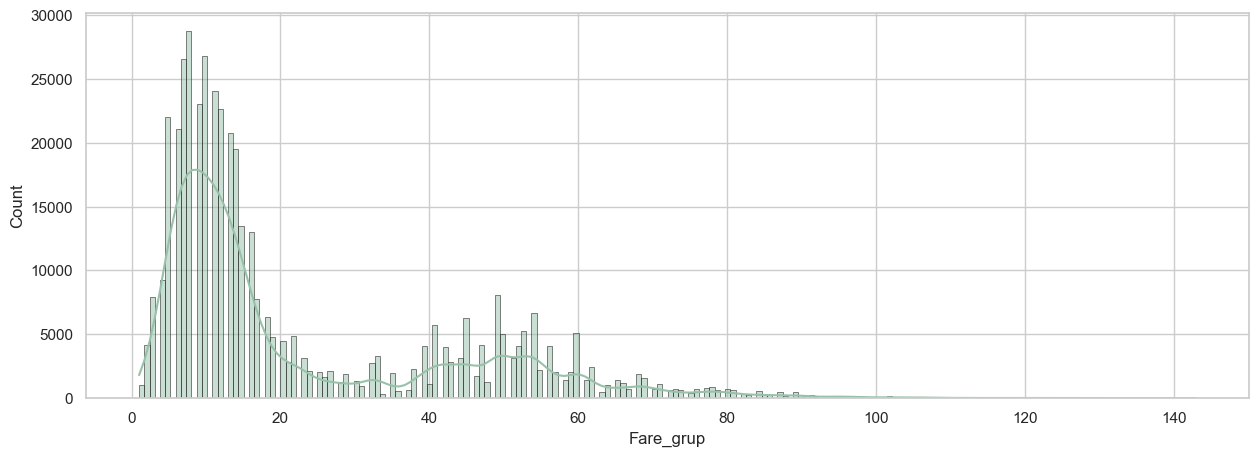

In [15]:
plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
df['Fare_grup'] = [ int(i / 1000) for i in df['Fare']]
ax=sns.histplot(df['Fare_grup'],kde=True,color=colors[0],edgecolor = 'k');
# ax.bar_label(ax.containers[0])

In [16]:
#skewness and kurtosis
print("Skewness: %f" % df['Fare'].skew())
print("Kurtosis: %f" % df['Fare'].kurt())

Skewness: 1.334754
Kurtosis: 0.895880


# Categorical

Journey_day    Airline    Class Source   Departure Total_stops      Arrival  \
0      Monday   SpiceJet  Economy  Delhi  After 6 PM    non-stop   After 6 PM   
1      Monday     Indigo  Economy  Delhi  After 6 PM    non-stop  Before 6 AM   
2      Monday   GO FIRST  Economy  Delhi  After 6 PM    non-stop  Before 6 AM   
3      Monday   SpiceJet  Economy  Delhi  After 6 PM    non-stop   After 6 PM   
4      Monday  Air India  Economy  Delhi  After 6 PM    non-stop   After 6 PM   

  Destination  
0      Mumbai  
1      Mumbai  
2      Mumbai  
3      Mumbai  
4      Mumbai

In [18]:
categorical_features

['Journey_day',
 'Airline',
 'Class',
 'Source',
 'Departure',
 'Total_stops',
 'Arrival',
 'Destination']

In [26]:
def catplot(x):
    sns.set(style='whitegrid')
    fig = plt.subplots(1,2,figsize = (15,4))
    plt.subplot(1,2,1)
    df[x].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, textprops={'fontsize':12})
    plt.subplot(1,2,2)
    ax=sns.histplot(data=df,x=x,color=colors[0],edgecolor = 'k')
    ax.bar_label(ax.containers[0])
    tit = x + ' Distribution'
    plt.suptitle(tit)
    fig = plt.subplots(1,1,figsize = (13,5))
    plt.subplot(1,1,1)
    ax=sns.boxplot(x = x ,y = 'Fare',data = df,palette = colors);
    tit2=x + ' vs fare'
    plt.title(tit2)

# Journey_day

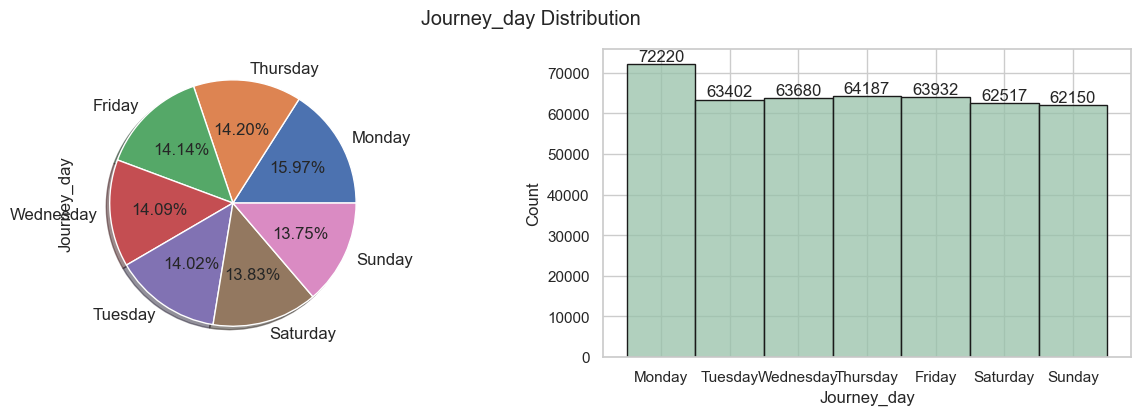

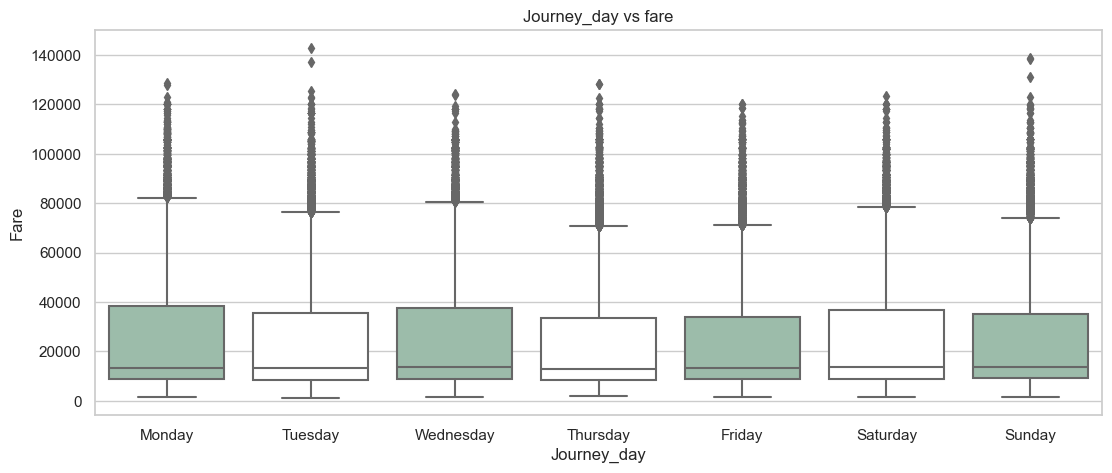

In [27]:
catplot('Journey_day')

# Airline

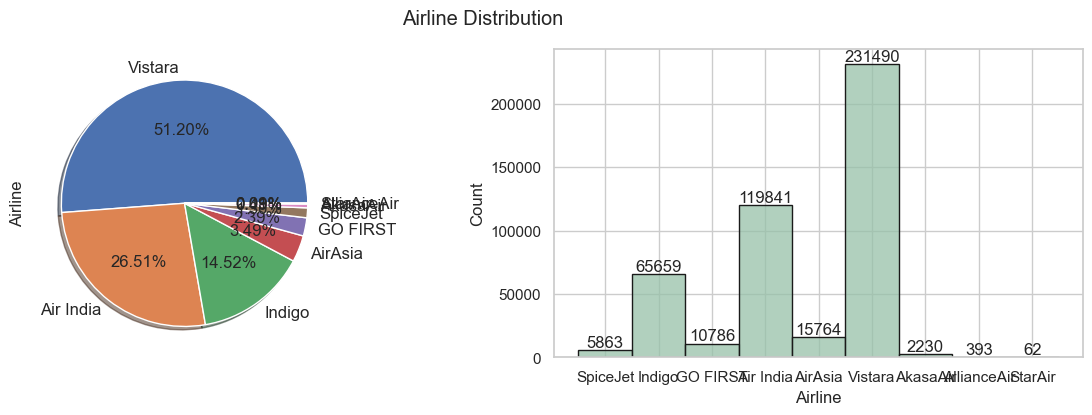

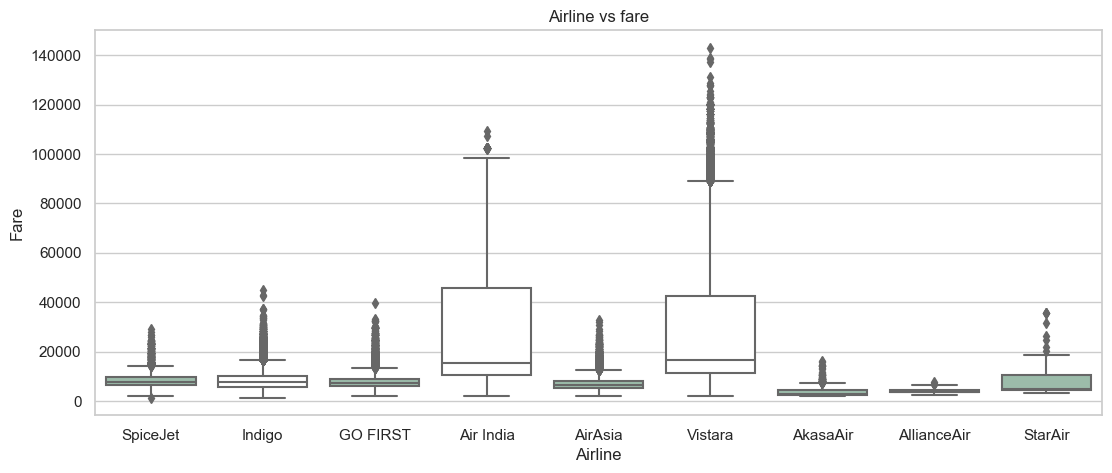

In [28]:
catplot('Airline')

# Class

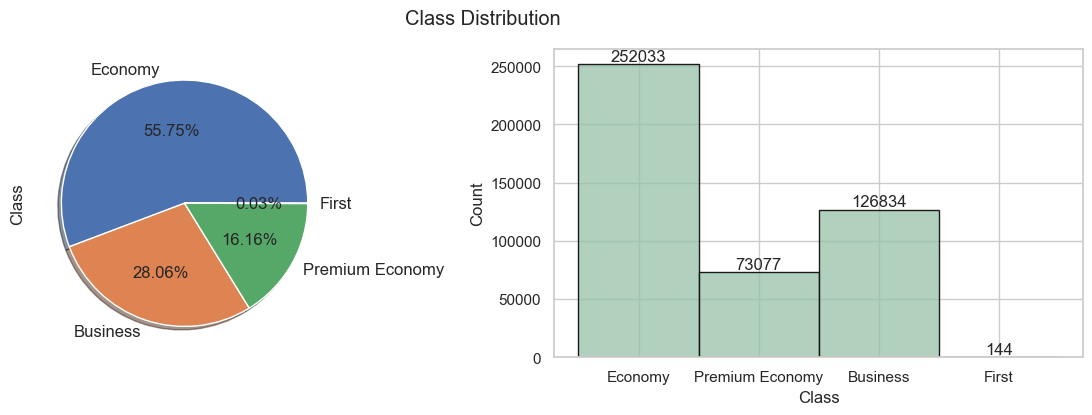

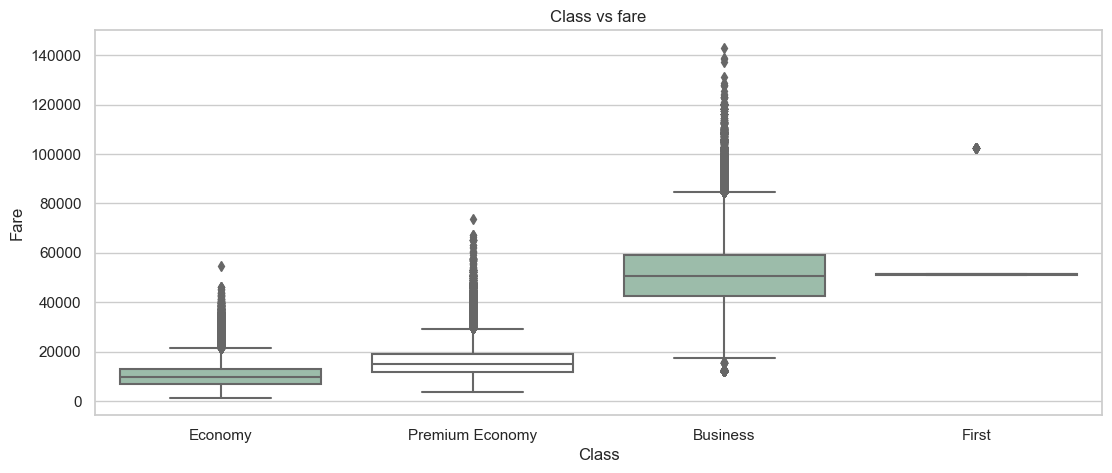

In [31]:
catplot('Class')

# Source

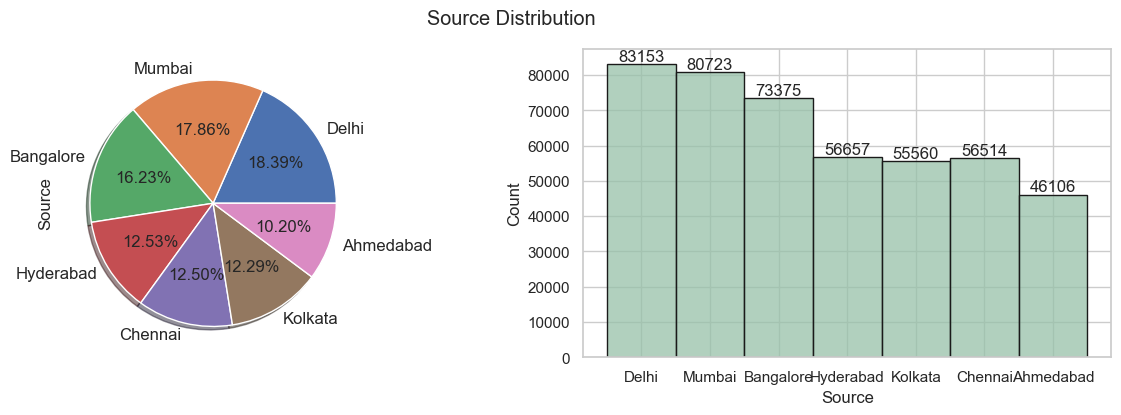

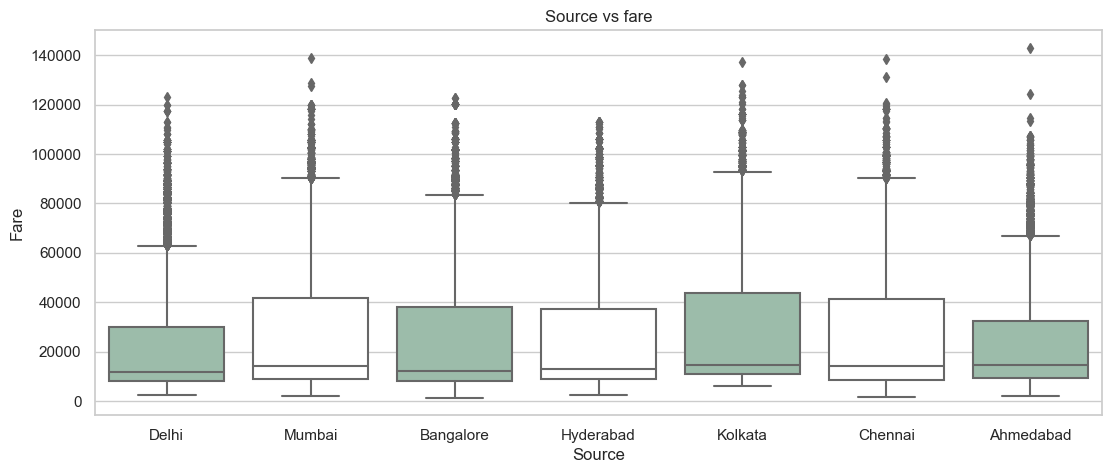

In [33]:
catplot('Source')

# Departure

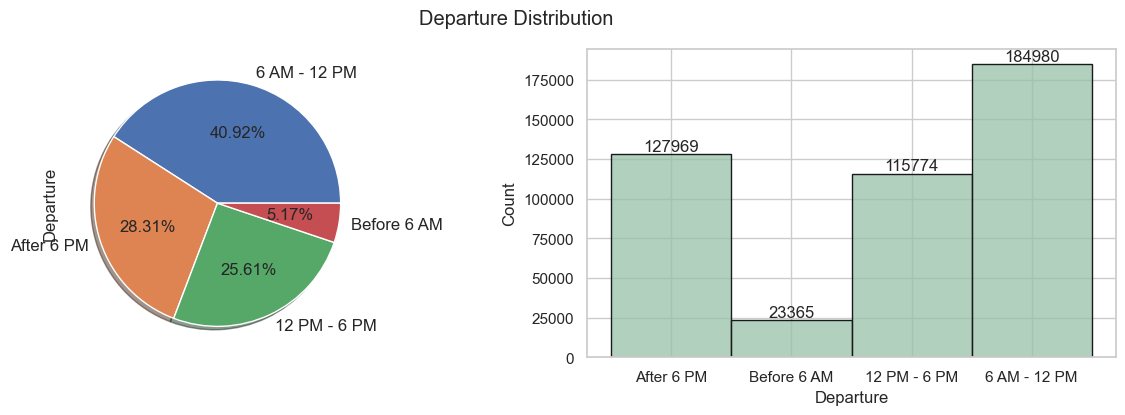

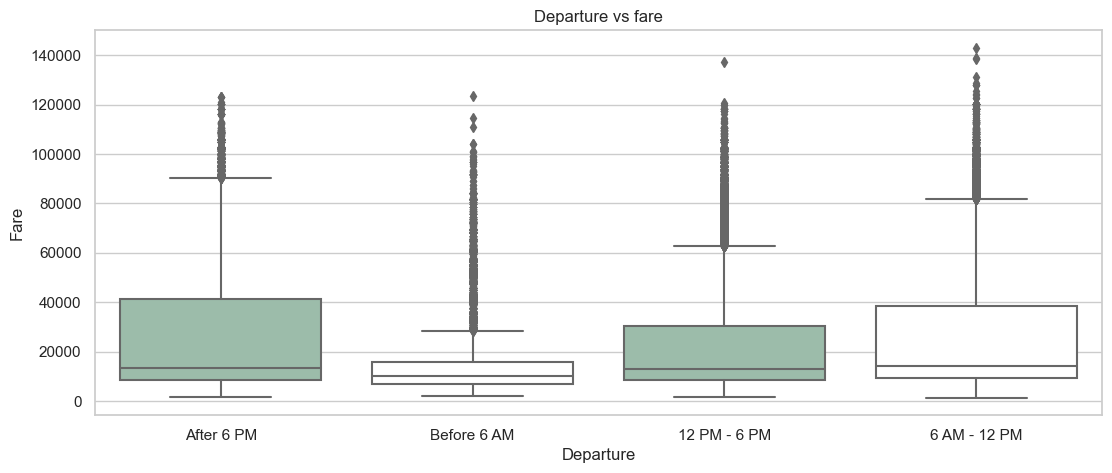

In [34]:
catplot('Departure')

# Total_stops

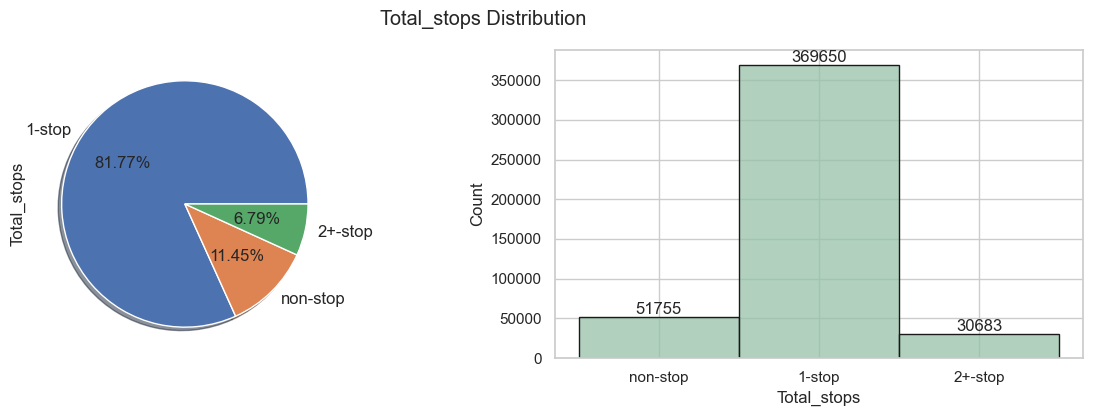

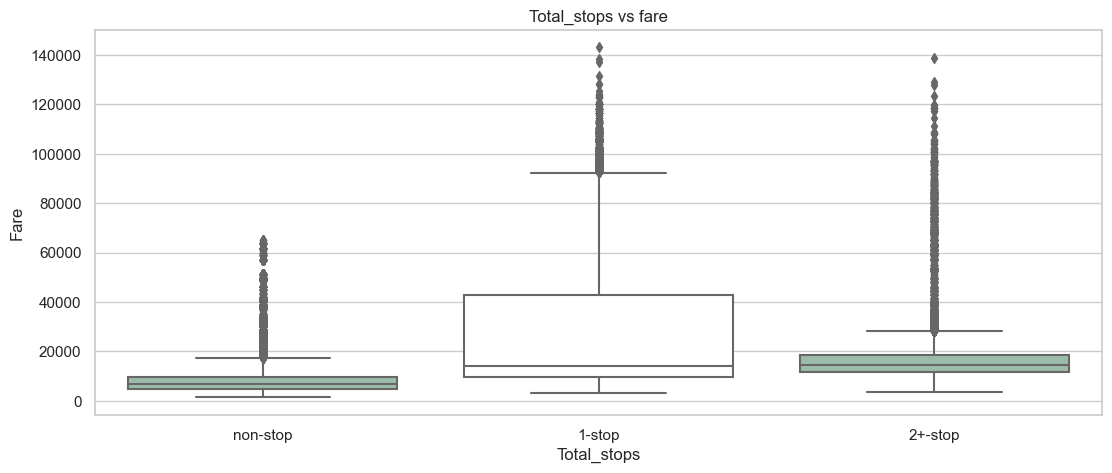

In [35]:
catplot('Total_stops')

# Arrival

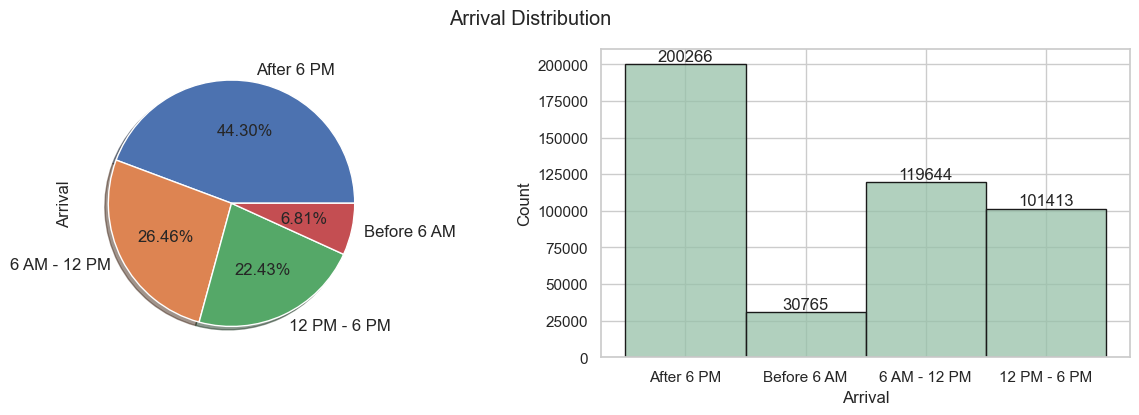

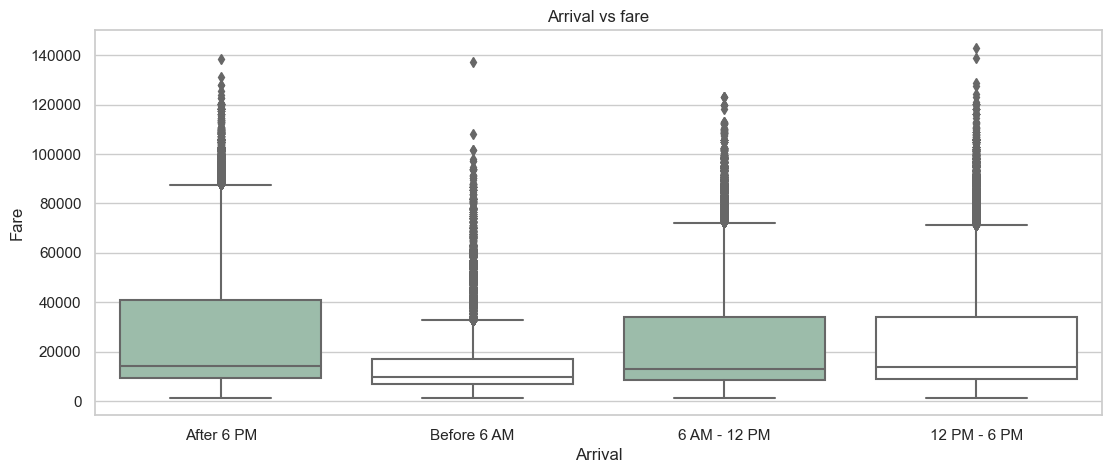

In [36]:
catplot('Arrival')

# Destination

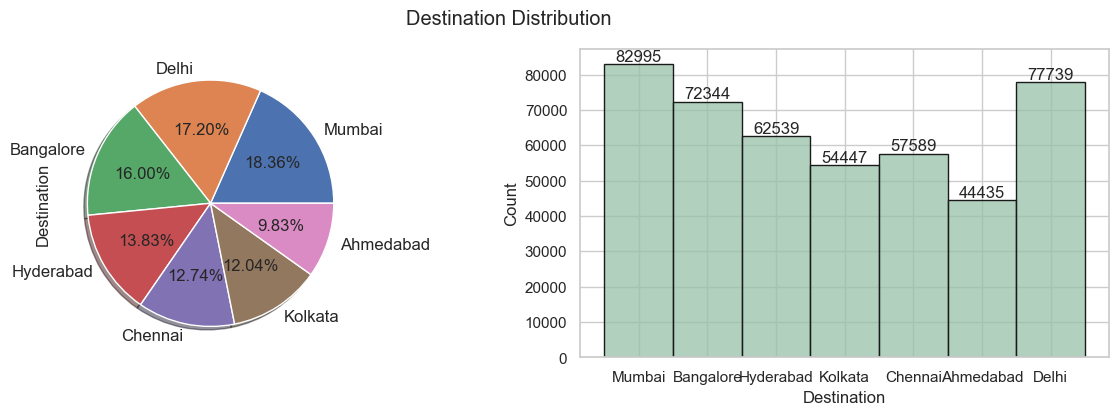

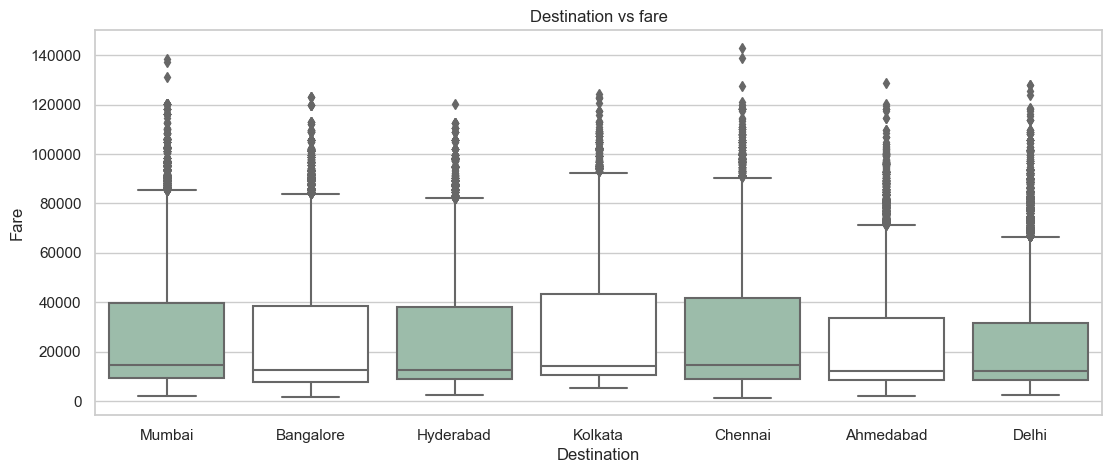

In [37]:
catplot('Destination')

# Airline with most flights

In [38]:
df1=df.groupby(['Airline','Flight_code'],as_index=False).count()

Text(0.5, 0.98, 'Airline with most flight')

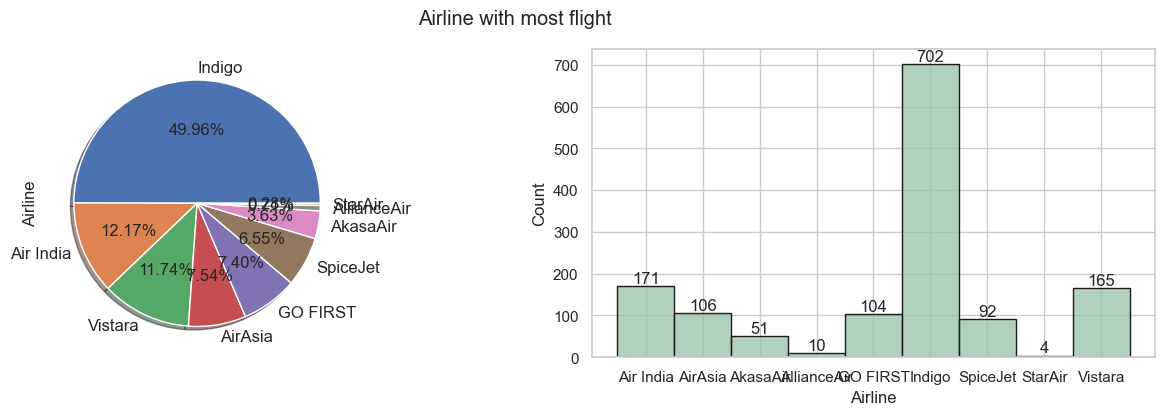

In [42]:
 sns.set(style='whitegrid')
 fig = plt.subplots(1,2,figsize = (16,4))
 plt.subplot(1,2,1)
 df1['Airline'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, textprops={'fontsize':12})
 plt.subplot(1,2,2)
 ax=sns.histplot(data=df1,x='Airline',color=colors[0],edgecolor = 'k')
 ax.bar_label(ax.containers[0])
 plt.suptitle('Airline with most flight')

# Classes of Different Airlines

In [43]:
df2= df.groupby(['Airline','Flight_code','Class'],as_index=False).count()

Text(0.5, 0.98, 'Classes of Different Airlines')

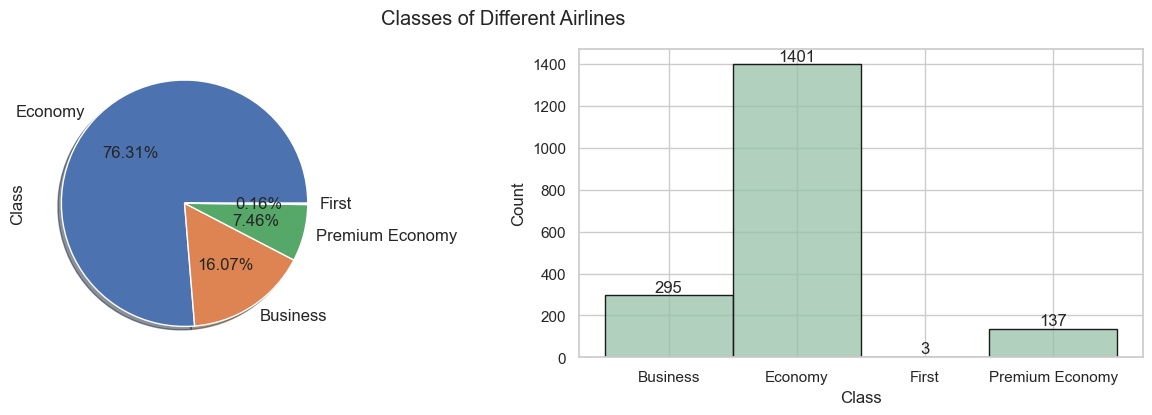

In [46]:
 sns.set(style='whitegrid')
 fig = plt.subplots(1,2,figsize = (16,4))
 plt.subplot(1,2,1)
 df2['Class'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, textprops={'fontsize':12})
 plt.subplot(1,2,2)
 ax=sns.histplot(data=df2,x='Class',color=colors[0],edgecolor = 'k')
 ax.bar_label(ax.containers[0])
 plt.suptitle('Classes of Different Airlines')


# Fare vs Duration based on class

In [47]:
df['dur']=df['Duration_in_hours'].round(0) 
df['Fare_group'] = [ int(i / 1000) for i in df['Fare']]

Text(0.5, 1.0, 'Fare vs Furation based on class')

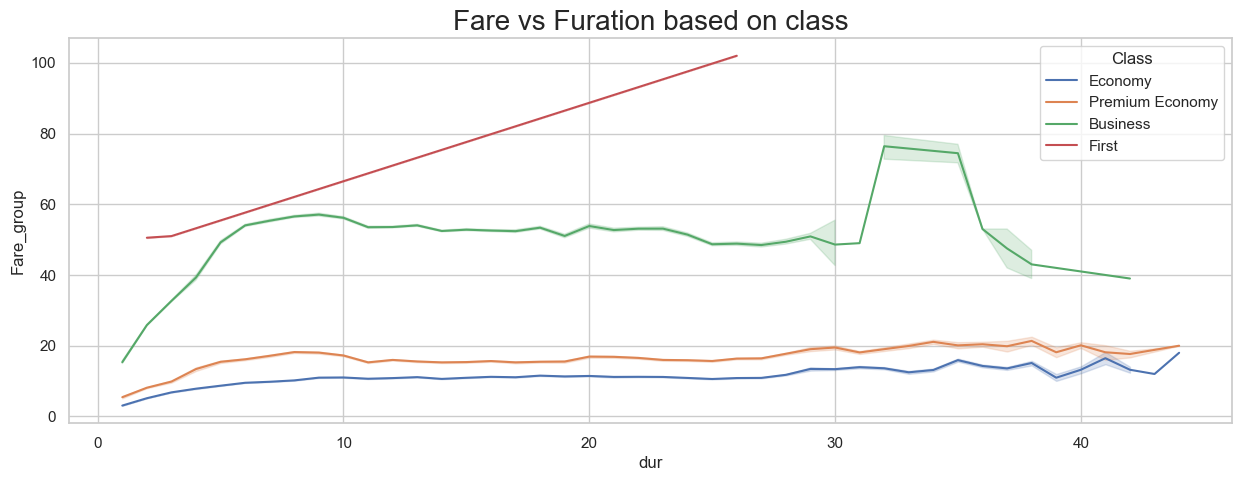

In [48]:
plt.figure(figsize=(15,5))
sns.lineplot(data = df,x = 'dur',y = 'Fare_group',hue = 'Class')
plt.title('Fare vs Furation based on class',fontsize=20)

# Days Left For Departure Versus Ticket Price of each Airline

Text(0.5, 1.0, 'Days Left For Departure Versus Ticket Price')

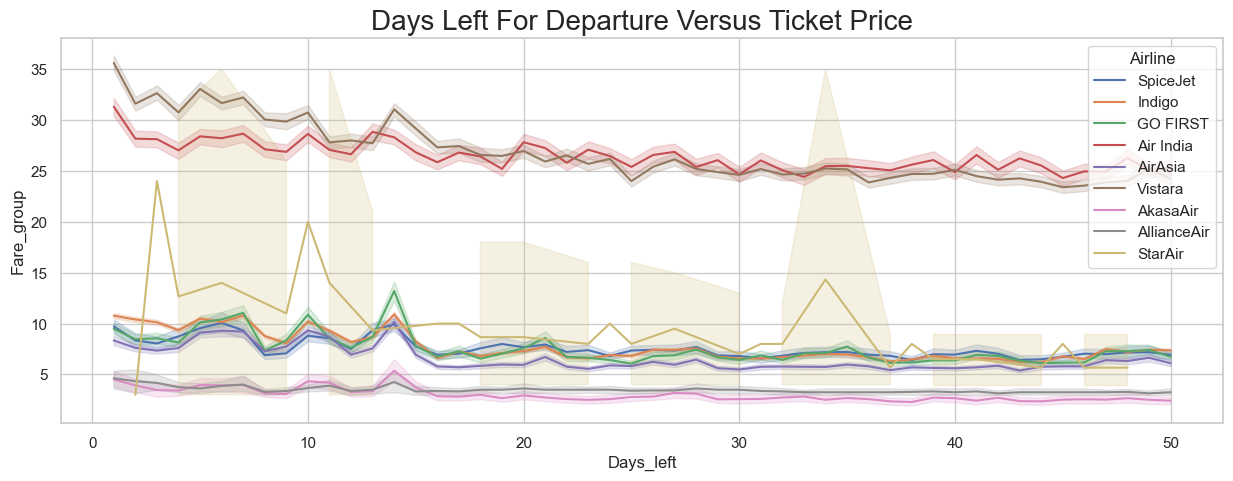

In [49]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='Days_left',y='Fare_group',hue='Airline')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)


# Total number of Flights from one city to another

In [54]:
df.groupby(['Flight_code','Source','Destination','Airline','Class'],as_index=False).count()


Flight_code     Source Destination  Airline            Class  \
0         6E-107     Mumbai   Ahmedabad   Indigo          Economy   
1         6E-107     Mumbai       Delhi   Indigo          Economy   
2         6E-107     Mumbai   Hyderabad   Indigo          Economy   
3         6E-108  Hyderabad       Delhi   Indigo          Economy   
4         6E-109  Bangalore      Mumbai   Indigo          Economy   
...          ...        ...         ...      ...              ...   
5828      UK-996     Mumbai   Hyderabad  Vistara  Premium Economy   
5829      UK-996     Mumbai     Kolkata  Vistara         Business   
5830      UK-996     Mumbai     Kolkata  Vistara          Economy   
5831      UK-996     Mumbai     Kolkata  Vistara  Premium Economy   
5832      UK-997      Delhi   Bangalore  Vistara          Economy   

      Date_of_journey  Journey_day  Departure  Total_stops  Arrival  \
0                   1            1          1            1        1   
1                   2            2          2            2        2   
2                   1            1          1            1        1   
3                  28           28         28           28       28   
4                  29           29         29           29       29   
...               ...          ...        ...          ...      ...   
5828               76           76         76           76       76   
5829              139          139        139          139      139   
5830              110          110        110          110      110   
5831               25           25         25           25       25   
5832               29           29         29           29       29   

      Duration_in_hours  Days_left  Fare  Fare_grup  dur  Fare_group  
0                     1          1     1          1    1           1  
1                     2          2     2          2    2           2  
2                     1          1     1          1    1           1  
3                    28         28    28         28   28          28  
4                    29         29    29         29   29          29  
...                 ...        ...   ...        ...  ...         ...  
5828                 76         76    76         76   76          76  
5829                139        139   139        139  139         139  
5830                110        110   110        110  110         110  
5831                 25         25    25         25   25          25  
5832                 29         29    29         29   29          29  

[5833 rows x 16 columns]

In [56]:
df.groupby(['Airline','Source','Destination'],as_index=False)['Fare'].mean().sort_values(by='Fare')


Airline     Source Destination          Fare
183   SpiceJet  Bangalore     Chennai   1307.000000
188   SpiceJet    Chennai   Bangalore   1938.000000
47     AirAsia    Chennai   Bangalore   2040.829932
42     AirAsia  Bangalore     Chennai   2119.570470
78    AkasaAir  Bangalore   Hyderabad   2377.225000
..         ...        ...         ...           ...
10   Air India  Bangalore     Kolkata  32308.814949
242    Vistara    Kolkata   Bangalore  32797.456832
246    Vistara    Kolkata      Mumbai  33404.911415
244    Vistara    Kolkata       Delhi  34249.584882
233    Vistara      Delhi     Kolkata  34254.492093

[253 rows x 4 columns]

# Feature Engineering
Encoding

In [57]:
FE=data.copy()

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in FE.columns:
    if FE[col].dtype=='object':
        FE[col]=le.fit_transform(FE[col])

# Scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [61]:
FE['Duration_in_hours']=FE['Duration_in_hours'].round(1)

In [62]:
FE.head()

Date_of_journey  Journey_day  Airline  Flight_code  Class  Source  \
0                0            1        6         1209      1       3   
1                0            1        5          164      1       3   
2                0            1        4          942      1       3   
3                0            1        6         1224      1       3   
4                0            1        0          852      1       3   

   Departure  Total_stops  Arrival  Destination  Duration_in_hours  Days_left  \
0          2            2        2            6                2.1          1   
1          2            2        3            6                2.3          1   
2          2            2        3            6                2.2          1   
3          2            2        2            6                2.1          1   
4          2            2        2            6                2.2          1   

   Fare  
0  5335  
1  5899  
2  5801  
3  5794  
4  5955

In [63]:
FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  int32  
 1   Journey_day        452088 non-null  int32  
 2   Airline            452088 non-null  int32  
 3   Flight_code        452088 non-null  int32  
 4   Class              452088 non-null  int32  
 5   Source             452088 non-null  int32  
 6   Departure          452088 non-null  int32  
 7   Total_stops        452088 non-null  int32  
 8   Arrival            452088 non-null  int32  
 9   Destination        452088 non-null  int32  
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int32(10), int64(2)
memory usage: 27.6 MB


In [64]:
mms = MinMaxScaler() # Normalization
# Normalization
FE['Duration_in_hours'] = mms.fit_transform(FE[['Duration_in_hours']])


In [65]:
FE


Date_of_journey  Journey_day  Airline  Flight_code  Class  Source  \
0                     0            1        6         1209      1       3   
1                     0            1        5          164      1       3   
2                     0            1        4          942      1       3   
3                     0            1        6         1224      1       3   
4                     0            1        0          852      1       3   
...                 ...          ...      ...          ...    ...     ...   
452083               49            1        8         1360      0       0   
452084               49            1        8         1358      0       0   
452085               49            1        8         1358      0       0   
452086               49            1        8         1374      0       0   
452087               49            1        8         1374      0       0   

        Departure  Total_stops  Arrival  Destination  Duration_in_hours  \
0               2            2        2            6           0.030374   
1               2            2        3            6           0.035047   
2               2            2        3            6           0.032710   
3               2            2        2            6           0.030374   
4               2            2        2            6           0.032710   
...           ...          ...      ...          ...                ...   
452083          1            0        2            2           0.287383   
452084          3            0        0            2           0.242991   
452085          3            0        0            2           0.242991   
452086          1            0        2            2           0.242991   
452087          1            0        2            2           0.242991   

        Days_left   Fare  
0               1   5335  
1               1   5899  
2               1   5801  
3               1   5794  
4               1   5955  
...           ...    ...  
452083         50  65028  
452084         50  69254  
452085         50  69254  
452086         50  72980  
452087         50  72980  

[452088 rows x 13 columns]

# Correlation

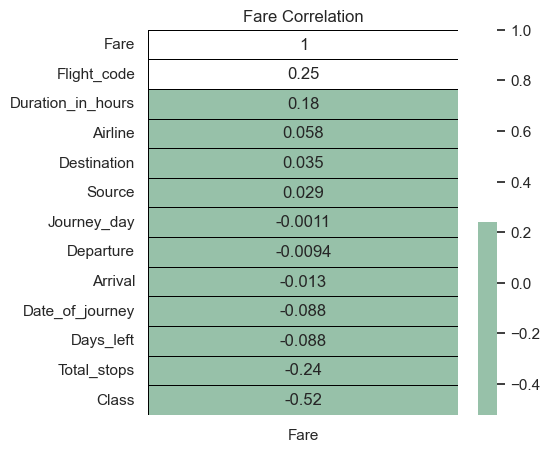

In [66]:
corr = FE.corrwith(data['Fare']).sort_values(ascending = False).to_frame()
corr.columns = ['Fare']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Fare Correlation');

In [74]:
df1=FE.copy()
df2=FE.copy()
# Dataset for model based on Statistical Test :
df1 = df1.drop(columns = ['Date_of_journey', 'Journey_day', 'Airline','Source', 'Departure','Arrival','Destination','Days_left'])

# Model

In [75]:
f1 = df1.iloc[:,:4].values
t1 = df1.iloc[:,4].values
f2 = df2.iloc[:,:12].values
t2 = df2.iloc[:,12].values


In [76]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.15, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.15, random_state=42)

In [77]:
def model(regression,x_train,y_train,x_test,y_test):
    regression.fit(x_train,y_train)
    prediction = regression.predict(x_test)
    print("MAPE Score : ", (np.mean(np.abs((y_test - prediction)/y_test))*100))

# XGB

In [78]:
Regressor_xgb = XGBRegressor(random_state=1)
model(Regressor_xgb,x_train1,y_train1,x_test1,y_test1)


MAPE Score :  20.65430686824043


In [79]:
model(Regressor_xgb,x_train2,y_train2,x_test2,y_test2)

MAPE Score :  13.872498552178717


# LGBM

In [80]:
Regressor_LGBM = LGBMRegressor(random_state=1)
model(Regressor_LGBM,x_train1,y_train1,x_test1,y_test1)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 508
[LightGBM] [Info] Number of data points in the train set: 384274, number of used features: 4
[LightGBM] [Info] Start training from score 22843.401307
MAPE Score :  23.21636103817918


In [81]:
model(Regressor_LGBM,x_train2,y_train2,x_test2,y_test2)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 384274, number of used features: 12
[LightGBM] [Info] Start training from score 22843.401307
MAPE Score :  17.40887743220468


# Gradient Booster

In [82]:
Regressor_grad = GradientBoostingRegressor(random_state=1)
model(Regressor_grad,x_train1,y_train1,x_test1,y_test1)


MAPE Score :  25.16846349044044


In [83]:
model(Regressor_grad,x_train2,y_train2,x_test2,y_test2)

MAPE Score :  21.606826834382666


# Hyperparameter Tuning


From these results it is found that Dataset 2 shows better results and XGB is the best model


In [101]:
""" here we are creating our dump file so user need to do it according to there file location and uncomment the following once"""
# from flaml import AutoML

# # Create an AutoML instance
# automl = AutoML()

# # Set the settings for AutoML
# settings = {
#     "time_budget": 120,  # total running time in seconds
#     "metric": 'mape',  # primary metrics for regression can be chosen from: ['mae', 'mse', 'mape', 'rmspe', 'r2']
#     "estimator_list": ['xgboost'],  # list of ML learners; we tune XGBoost in this example
#     "task": 'regression',  # task type, set to 'regression' for regression problems
#     "log_file_name": 'xg4.log',  # flaml log file location
#     "seed": 1,  # random seed for reproducibility
# }

# # Fit the AutoML model with the provided settings and training data
# automl.fit(X_train=x_train2, y_train=y_train2, **settings)


[flaml.automl.logger: 07-31 13:26:53] {1693} INFO - task = regression
[flaml.automl.logger: 07-31 13:26:53] {1700} INFO - Data split method: uniform
[flaml.automl.logger: 07-31 13:26:53] {1703} INFO - Evaluation method: holdout
[flaml.automl.logger: 07-31 13:26:53] {1801} INFO - Minimizing error metric: mape
[flaml.automl.logger: 07-31 13:26:53] {1911} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl.logger: 07-31 13:26:53] {2221} INFO - iteration 0, current learner xgboost
[flaml.automl.logger: 07-31 13:26:53] {2347} INFO - Estimated sufficient time budget=13639s. Estimated necessary time budget=14s.
[flaml.automl.logger: 07-31 13:26:53] {2394} INFO -  at 0.1s,	estimator xgboost's best error=0.6054,	best estimator xgboost's best error=0.6054
[flaml.automl.logger: 07-31 13:26:53] {2221} INFO - iteration 1, current learner xgboost
[flaml.automl.logger: 07-31 13:26:53] {2394} INFO -  at 0.2s,	estimator xgboost's best error=0.3353,	best estimator xgboost's best error=0.

[flaml.automl.logger: 07-31 13:27:31] {2221} INFO - iteration 33, current learner xgboost
[flaml.automl.logger: 07-31 13:27:35] {2394} INFO -  at 42.0s,	estimator xgboost's best error=0.1263,	best estimator xgboost's best error=0.1263
[flaml.automl.logger: 07-31 13:27:35] {2221} INFO - iteration 34, current learner xgboost
[flaml.automl.logger: 07-31 13:27:40] {2394} INFO -  at 46.8s,	estimator xgboost's best error=0.1263,	best estimator xgboost's best error=0.1263
[flaml.automl.logger: 07-31 13:27:40] {2221} INFO - iteration 35, current learner xgboost
[flaml.automl.logger: 07-31 13:27:48] {2394} INFO -  at 54.7s,	estimator xgboost's best error=0.0846,	best estimator xgboost's best error=0.0846
[flaml.automl.logger: 07-31 13:27:48] {2221} INFO - iteration 36, current learner xgboost
[flaml.automl.logger: 07-31 13:27:50] {2394} INFO -  at 57.0s,	estimator xgboost's best error=0.0846,	best estimator xgboost's best error=0.0846
[flaml.automl.logger: 07-31 13:27:50] {2221} INFO - iteratio

In [102]:
# ''' pickle and save the automl object '''
# with open('fare_pred.pkl', 'wb') as f:
#     pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

In [103]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((np.abs((y_true - y_pred) / y_true)) * 100).round(2)

In [104]:
tuned_model = pd.read_pickle(r'fare_pred.pkl')

In [105]:
XGB_Tuned = tuned_model.predict(x_test2)
print("MAPE Score : ", (np.mean(np.abs((y_test2 - XGB_Tuned)/y_test2))*100))

MAPE Score :  7.862732569824084
